İnternet üzerindeki açık veri kaynakları, bu verileri kullanan uygulamalar geliştirmek isteyenler ya da üzerinde çalıştıkları problemlere farklı alanlardan derledikleri verileri de katmak isteyenler için birçok imkan sunuyor. Örnek olarak Twitter üzerindeki tweetleri kullanarak duygu analizi yapmak ya da hava durumu, hisse senedi fiyatları gibi verileri de analizinize katmak açık veri kaynakları sayesinde mümkün.

İlker, [Star Wars](http://www.veridefteri.com/2017/12/13/veri-defteri-ben-seviyor-cok/) filmlerinin verisi kullanılarak hazırlanmış bir uygulama ara yüzünden (Application Programming Interface, API) bahsetmişti. Bu yazıda benzer bir uygulamayı Foursquare API'ı üzerinden yapacağız.

Bildiğiniz gibi, Foursquare konum temelli arama yapmanızı sağlayan ve istediğiniz konularda (restoran, ziyaret edilecek yerler) tavsiyeler alabileceğiniz bir servis. Konum temelli uygulamalar geliştirmek ya da konuma bağlı sorularınıza cevap aramak için Foursquare üzerindeki verilerden yararlanabilirsiniz.

Foursquare API'ını kullanmak için ilk yapmamız gereken [Foursquare](https://developer.foursquare.com/) üzerinden bir geliştirici (developer) hesabı açmak. Geliştirici hesabı üzerinden 'Yeni bir uygulama oluştur'a girerek uygulamanızın detaylarını oluşturabilirsiniz.

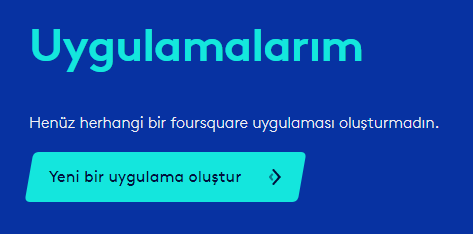

In [1]:
from IPython.display import Image
Image("uygulama.PNG")

Uygulamanız için bir isim ve web sayfası girmeniz gerekiyor. 

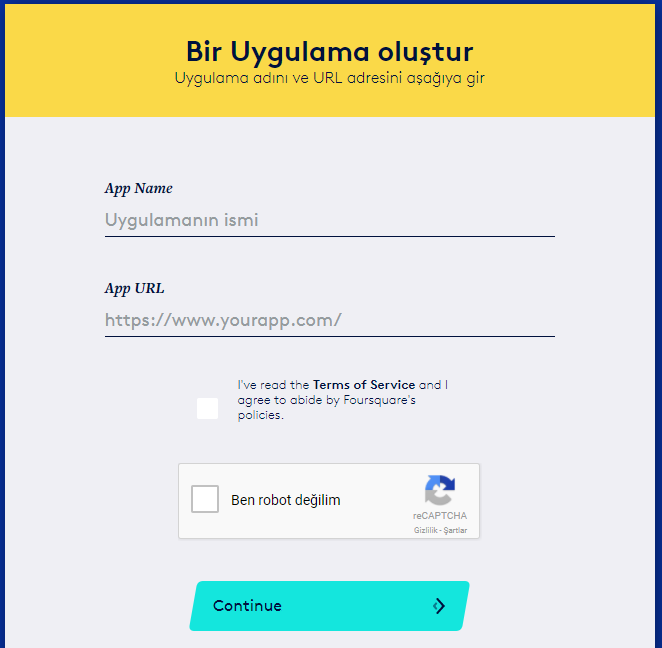

In [2]:
Image("uygulamaolustur.PNG")

Bir sonraki aşamada hesap tipini seçmelisiniz. Ben deneme amacıyla 'Sandbox' tipi bir hesap kullandım. 'Sandbox' hesabının kötü yanı günlük 1000 adet sorguyla kısıtlı olması. Hesabınızı doğrulatarak, ücretsiz olarak 'Personal' tipi bir hesap açabilir ve daha fazla sorgulama yapabilirsiniz. 

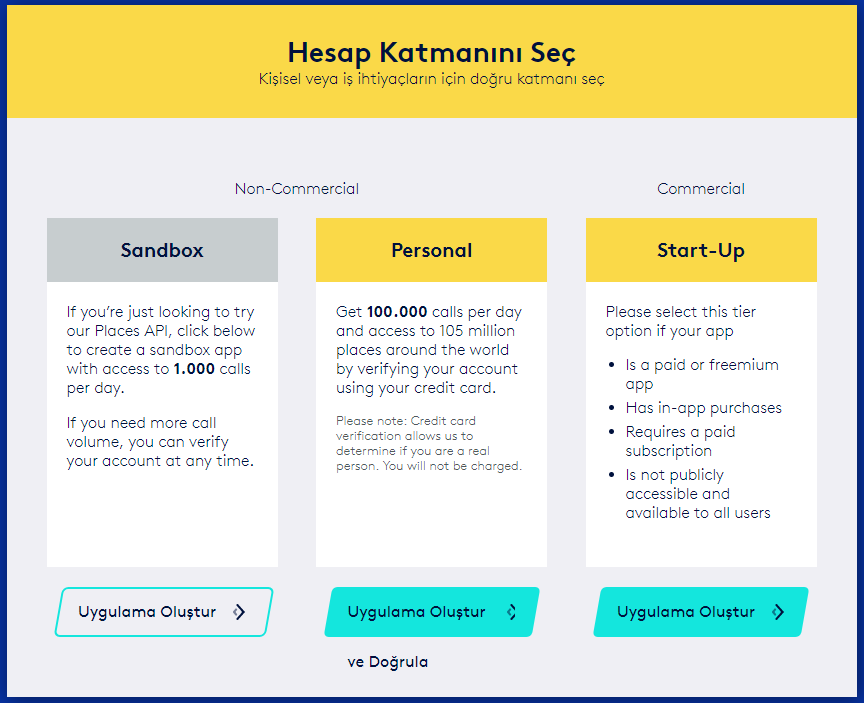

In [3]:
Image("hesap.PNG")

Hesap tipini seçtikten sonra, Foursquare size 'Client ID' ve 'Client Secret' adlı iki anahtar sağlayacak. Bu anahtarlar API ile haberleşmenize olanak verecek kişisel bilgilerinizdir. Bu nedenle aşağıdaki dosyada bu anahtarları gizledim.

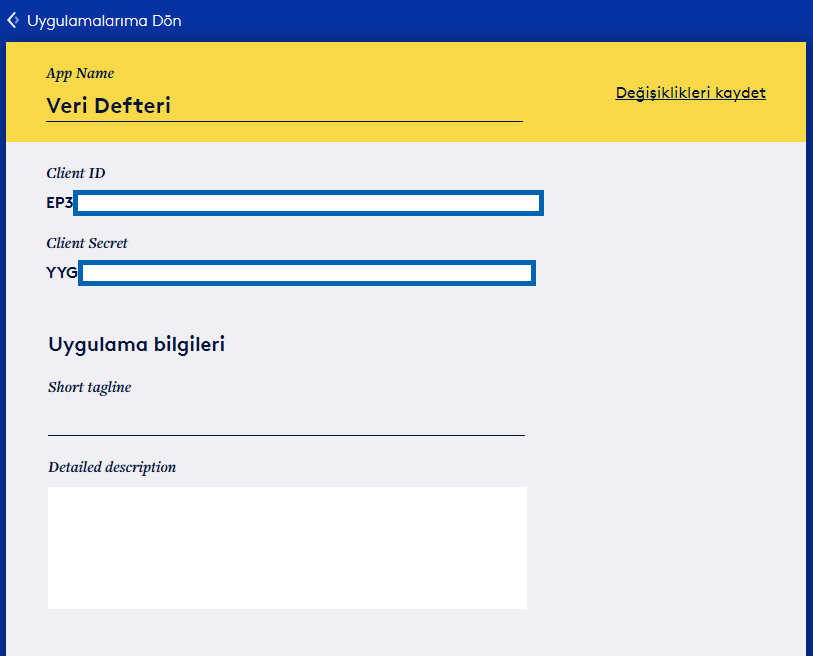

In [4]:
Image("anahtar.png")

Bu işlemleri yaptıktan sonra artık API'ı kullanabilirsiniz. Kayıt için gerekli adımları [FourSquare API dokümanında](https://developer.foursquare.com/docs/api/getting-started) bulabilirsiniz. API'ı kullanmak için ilk olarak 'Client ID' ve 'Client Secret' anahtarlarını tanıtıyoruz. Anahtarları aşağıda da gizledim.

In [5]:
client_id = 'EP3...............'
client_secret = 'YYG...............'

Artık API'ı kullanmaya hazırız. Daha önce [Star Wars](http://www.veridefteri.com/2017/12/13/veri-defteri-ben-seviyor-cok/) API'nda olduğu gibi Foursquare API'ndan çekeceğimiz veri de JSON formatında. Yani veri *alan anahtarı: değer* şeklinde ikililer olarak tutuluyor. Süslü parantezler yardımıyla iç içe geçmiş bir yapı kurmak da mümkün. JSON formatı Kaan'ın [yazısında](http://www.veridefteri.com/2017/12/11/python-programlamaya-giris-sayilar-aritmetik-temel-veri-yapilari/) değindiği Python sözlükleri ile aynı yapıda.

İlk olarak mekan aramayı deneyelim. Veriler JSON formatında olduğu için `json` paketini ve API'a sorgu göndermek için de `requests` paketini kullanacağız. Aşağıdaki örnekte Ayasofya'yı bularak başlayalım.

In [6]:
# API'a sorgu göndermek için requests paketini kullanıyoruz.
import requests
# JSON formatındaki verileri almak ve yazdırmak için json paketine ihtiyacımız var.  
import json

# Arama yapmak istediğimiz için aşağıdaki URL'yi kullanıyoruz. Arama dışındaki örneklerde URL değişecek.
url = 'https://api.foursquare.com/v2/venues/search'

# Sorgu parametrelerini tanımlayalım. 
"""
client_id ve client_secret kendimizi Foursquare'e tanımlamak için kullandığımız anahtarlar.
v değeri API'ın hangi versiyonunu kullandığımızı gösteriyor ve zorunlu bir alan.
query değeri de yapmak istediğimiz sorgunun arama kelimesi
"""
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  query='Ayasofya'
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(json.dumps(data,indent = 4))

{
    "meta": {
        "code": 400,
        "errorType": "param_error",
        "errorDetail": "Must provide parameter ll",
        "requestId": "5a634a4b9fb6b764642942b1"
    },
    "response": {}
}


Kodumuz çalıştı gibi görünse de aslında bir hata aldık. Arama yaparken arama yaptığımız yaklaşık yeri de vermemiz gerekiyor. Bunu yapmanın iki yolu var. `ll` ile bir yer koordinatı verebiliriz (Tarihi yarımada yaklaşık olarak 41.01 enleminde ve 28.97 boylamında) ya da `near` ile bulunduğu bölge hakkında bir ipucu verebiliriz. Ben, ayrıca, döndürülen sonuç sayısını limitlemeyi tercih ettim. Bu sayede karşımıza tek bir sonuç çıkacak ve adında Ayasofya olan diğer yerlerin de veri setinde yer almasını engelleyeceğiz.

In [7]:
"""
ll değeri enlem ve boylam cinsinden aramak istediğimiz yeri belirtiyor ve tarihi yarımadanın koordinatlarına denk geliyor.
limit değeriyle tek bir sonuç döndürmeyi tercih ettik.
"""
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  ll="41.01,28.97",
  query='Ayasofya',
  limit=1
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(json.dumps(data,indent = 4, ensure_ascii= False))

{
    "meta": {
        "code": 200,
        "requestId": "5a634a4bf594df01e978d8db"
    },
    "response": {
        "venues": [
            {
                "id": "4bc8088f15a7ef3b6b857ada",
                "name": "Ayasofya | Hagia Sophia (Ayasofya)",
                "contact": {
                    "phone": "+902125221750",
                    "formattedPhone": "+90 212 522 17 50"
                },
                "location": {
                    "address": "Ayasofya Myd. Sultanahmet",
                    "lat": 41.0082839956457,
                    "lng": 28.979008518719493,
                    "distance": 780,
                    "postalCode": "34122",
                    "cc": "TR",
                    "city": "Fatih",
                    "state": "İstanbul",
                    "country": "Türkiye",
                    "formattedAddress": [
                        "Ayasofya Myd. Sultanahmet",
                        "34122 Fatih",
                        "Türkiye"
          

Veri setinde `reponse` anahtarının altında sorgulamamızla ilişkili sonuçlara erişebiliriz. Sonucun altında koyduğumuz limit sayesinde tek bir mekan (`venues`) bulunmakta. Burada önemli olan anahtarlar:

| Anahtar       | Anlam                            |               Değer              |
|:------------- |:---------------------------------|:---------------------------------|
| id            | Mekanın belirteci                | 4bc8088f15a7ef3b6b857ada         |
| name          | Mekanın adı                      | Ayasofya Hagia Sophia (Ayasofya) |
| lat           | Boylamı                          | 41.00824813964318                |
| lng           | Enlemi                           | 28.978616263778942               |
| distance      | Aradığımız koordinatlara uzaklık | 749 metre                        |
| checkinsCount | Check-in sayısı                  | 223738                           |
| usersCount    | Kullanıcı sayısı                 | 183768                           |
| tipCount      | Tavsiye sayısı                   | 1147                             |

Ayasofya'nın Foursquare [sayfasını](https://tr.foursquare.com/v/ayasofya--hagia-sophia/4bc8088f15a7ef3b6b857ada) ziyaret ederek yukarıdaki değerleri kontrol edebilirsiniz. Özellikle check-in sayısı, kullanıcı sayısı, tavsiye sayısı ve tavsiyeler konumların popülerliği hakında ipucu verecek bilgiler.

Bir diğer arama yöntemi olarak da Paris yakınındaki Eyfel Kulesi'ni arayalım. Bu sefer koordinat vermek yerine yaklaşık yeri belirteceğiz (`near = "Paris"`)

In [8]:
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  near = "Paris",
  query='Eiffel Tower', 
  limit = 1
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
print(json.dumps(data['response']['venues'],indent = 4, ensure_ascii= False))

[
    {
        "id": "51a2445e5019c80b56934c75",
        "name": "Tour Eiffel",
        "contact": {
            "phone": "+33892701239",
            "formattedPhone": "+33 892 70 12 39",
            "twitter": "latoureiffel",
            "instagram": "toureiffelofficielle",
            "facebook": "141184112585566",
            "facebookUsername": "TourEiffel",
            "facebookName": "Tour Eiffel"
        },
        "location": {
            "address": "5 avenue Anatole France",
            "crossStreet": "Parc du Champ-de-Mars",
            "lat": 48.858249354605626,
            "lng": 2.2944259643554683,
            "labeledLatLngs": [
                {
                    "label": "display",
                    "lat": 48.858249354605626,
                    "lng": 2.2944259643554683
                }
            ],
            "postalCode": "75007",
            "cc": "FR",
            "city": "Paris",
            "state": "Île-de-France",
            "country": "France",
    

Gördüğünüz gibi koordinat yerine yaklaşık olarak yer vermek de aynı işi görüyor. Şimdi Eyfel Kulesi'yle ilgili en popüler 10 yorumu görelim. Bir mekanla ilgili tavsiyeleri görmek için mekanın belirtecini de url'ye eklememiz gerekiyor.  Yorumların metin kısmıyla ilgileneceğimiz için, süslü parantez yapısına göre, `response` - `tips` - `items` alanlarına erişmemiz gerekiyor. Hangi alanlara erişmemiz gerektiğini aşağıdaki kodda bulunan `data` sözlüğünün yapısını inceleyerek bulabilirsiniz. Bu alanların altındaki her bir yorum için de `text` alanının değerini bastıralım.

In [9]:
# Dokümandaki url "https://api.foursquare.com/v2/venues/VENUE_ID/tips" şeklinde.
# VENUE_ID'yi sorgulayacağımız mekana göre değiştirmemiz gerekiyor.
# Eiffel Kulesi'nin belirteci: 51a2445e5019c80b56934c75
url = "https://api.foursquare.com/v2/venues/51a2445e5019c80b56934c75/tips"
    
params = dict(
  client_id=client_id,
  client_secret=client_secret,
  v='20170801',
  sort = "popular",
  limit=10
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)

for tavsiye in data['response']['tips']['items']:
    print(tavsiye['text'])

Icon of Paris. Nuff said. Go to the top and enjoy the view.
Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.
La tour Eiffel est l'icône de Paris, pourtant, à l'exception de vos photos traditionnelles avec la tour sur l'arrière-plan il n'y a pas grand-chose. Vous devriez aller avant 9h00.
Aussi, vous devriez y aller la nuit. Vous devriez avoir une vue incroyable avec une superbe photo.
Welcome to one of the world's most iconic monuments 😜 From the 🔝 you can take beautiful shots 😜😍📸👍
I went there for fun, the joy of being on the top, and sightseeing. I'd suggest buying the tickets in advance to avoid the long queues.
Sit by the river right next to the tower for best view at midnight when it sparkles for 5 mins. Another option is to see it from louvre that's a further view! Beautiful 5 mins of ur life!
The famous landmark! Take a tour to the summit that cost €17 for an adult. Beware of pickpocket in the elevator! Enjoy the v

Eyfel Kulesi'yle ilgili tavsiyeleri almak için Eyfel Kulesi'nin belirtecini de url'ye eklemek durumunda kaldık. Bunu yapmadan da tavsiyelere ulaşmak mümkün. Foursquare API'ını kullanmanın bir diğer yolu linkteki [Github](https://github.com/mLewisLogic/foursquare) dizinindeki kütüphane. Python için API'ı kullanmayı kolaylaştıran `foursquare` kütüphanenesini aşağıdaki [sihirli ifadeyle](http://www.veridefteri.com/2017/11/28/ipython-sihirli-ifadeler/) yükleyebilirsiniz. Sadece diyez işaretini kaldırmanız gerekecek.

In [10]:
# Yanlışlıkla yüklemeyi engellemek için sihirli ifade yorum olarak girildi.
# foursquare paketini yüklemek için aşağıdaki satırda # işaretini kaldırmanız yeterli.
# !pip install foursquare

Paketi yükledikten sonra, kendimizi tanıtmamız gerekiyor. Kendimizi tanıtmak için yukarıda oluşturduğunuz anahtarları kullanabilirsiniz.

In [11]:
import foursquare as fs
#Anahtarlarımızı tanıtarak izin alıyoruz.
client = fs.Foursquare(client_id=client_id, client_secret=client_secret)
auth_uri = client.oauth.auth_url()

Şimdi Ayasofya yakınlarındaki restoranları arayalım. 1.5 km mesafedeki en popüler 10 restoranı bulalım ve uzaklıklarıyla birlikte sonuçları görelim. Kullanabileceğiniz başka sıralama yöntemleri ve parametreleri öğrenmek için API dokümantasyonu size yardımcı olacaktır.

In [12]:
params = dict(
  query = 'restaurant',
  ll = '41.00824813964318,28.978616263778942',
  radius = 1500,
  sort = "popular",
  limit=10
)

data = client.venues.search(params=params)
for restaurant in data['venues']:
    print("Restoran adı: {} Uzaklık: {} metre".format(restaurant['name'], restaurant["location"]["distance"]))

Restoran adı: Neyzen Restaurant Uzaklık: 1253 metre
Restoran adı: Sefa-i Hürrem Cafe & Restaurant Uzaklık: 1393 metre
Restoran adı: Meşale Restaurant & Cafè Uzaklık: 299 metre
Restoran adı: Hamdi Restaurant Uzaklık: 1235 metre
Restoran adı: Afrodit Restaurant Uzaklık: 1247 metre
Restoran adı: Namlı Cafe Şarküteri Restaurant Uzaklık: 1191 metre
Restoran adı: Fuego Cafe & Restaurant Uzaklık: 116 metre
Restoran adı: Seoul Restaurant Uzaklık: 349 metre
Restoran adı: Albura Kathisma Cafe & Restaurant Uzaklık: 316 metre
Restoran adı: Olive Anatolian Restaurant Uzaklık: 463 metre


İki sorgununda da parametrelerini sözlük yapısında vermemiz gerekti. Aynı zamanda kullandığımız parametreler de aynıydı. Orijinal API'ı kullanmakla `foursquare` paketini kullanmak arasında gözüken iki fark var:
 
* Sonuçları görmek için `response` alanına erişmek zorunda kalmadık. `foursquare` paketi bize zaten `response` alanını döndürüyor, sorgunuzla ilgili üst veriyi (`metadata`) döndürmüyor.
* Sorgu için herhangi bir `url` girmemiz gerekmedi. `foursquare` paketi sayesinde adresi ezberlemenize ya da araştırmanıza gerek kalmadı. Ancak paketin altındaki fonksiyonları öğrenmeniz gerekiyor. 

Bahsettiğim konular dışında bir fark yok gibi. Eyfel Kulesi'yle ilgili tavsiyeleri bir de `foursquare` paketiyle alalım.

In [13]:
params = dict(
  sort = "popular",
  limit=10
)
data = client.venues.tips('51a2445e5019c80b56934c75', params=params)
for tavsiye in data['tips']['items']:
    print(tavsiye['text'])

Icon of Paris. Nuff said. Go to the top and enjoy the view.
Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.
La tour Eiffel est l'icône de Paris, pourtant, à l'exception de vos photos traditionnelles avec la tour sur l'arrière-plan il n'y a pas grand-chose. Vous devriez aller avant 9h00.
Aussi, vous devriez y aller la nuit. Vous devriez avoir une vue incroyable avec une superbe photo.
Welcome to one of the world's most iconic monuments 😜 From the 🔝 you can take beautiful shots 😜😍📸👍
I went there for fun, the joy of being on the top, and sightseeing. I'd suggest buying the tickets in advance to avoid the long queues.
Sit by the river right next to the tower for best view at midnight when it sparkles for 5 mins. Another option is to see it from louvre that's a further view! Beautiful 5 mins of ur life!
The famous landmark! Take a tour to the summit that cost €17 for an adult. Beware of pickpocket in the elevator! Enjoy the v

`foursquare` paketini kullanmadığımızda sorgu adresini değiştirmemiz (adresin içine mekanın belirtecini girmemiz) gerekmişti. `foursquare` paketiyle mekan belirtecini bir parametre olarak sorguya vermemiz yeterli oldu. Paketi kullanmak, adresleri girmemek ve değiştirmek zorunda kalmamak nedeniyle bana daha kolay geldi. Ancak paketin dokümantasyonunun çok da iyi olmadığını belirtmem gerek.

Hem Foursquare API'ı hem de `foursquare` paketi üzerinden başka bilgilere erişmek mümkün. Kullanıcıların check-in yaptığı ve beğendiği yerlere, diğer bilgilerine, yüklediği fotoğraflara API üzerinden erişebiliyoruz. Mekanlarla ilgili olarak da çalışma saatleri, mekanın fotoğrafları, tavsiyeler gibi verileri derleyebiliyoruz. Aynı zamanda fotoğraf, check-in ve tavsiyeler için API sorguları da mevcut.

Bu yazıya Jupyter defteri olarak [Github](https://github.com/sibirbil/VeriDefteri) dizinimizden erişebilirsiniz.